In [4]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

for row in data :
    for i in range(4, 8) : # 필요한 열만 추출
        row[i] = int(row[i])
    print(row)
    break

['20-Apr', '1호선', '150', '서울역', 775859, 748330, 139595, 130554]


In [12]:
# 유임 승차 비율이 가장 높은 역
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

maxRate = 0
eachStationRate = 0 # 각각 지하철의 유임승차 비율
noOfPassengers = 0
maxRateStation = '' # 최대비율 역 이름 저장
date = '' # 최대비율 일시 저장

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    noOfPassengers = row[4] + row[6] # 전체승차인원
    if row[6] != 0 and noOfPassengers > 100000: # 무임승차 0인곳은 배제
        eachStationRate = row[4] / noOfPassengers #유임승차 / 전체승차
        if eachStationRate > maxRate :
            maxRate = eachStationRate
            maxRateStation = row[3] + ' ' + row[1]
            date = row[0]
           
print(date, maxRateStation, round(maxRate*100, 2), '%')
print(date, maxRateStation, '%.2f%%' %round(maxRate*100, 2))   
print(date, maxRateStation, format(round(maxRate*100, 2), '3.2f'), '%')

20-Apr 마곡나루(서울식물원) 공항철도 1호선 95.14 %
20-Apr 마곡나루(서울식물원) 공항철도 1호선 95.14%
20-Apr 마곡나루(서울식물원) 공항철도 1호선 95.14 %


In [4]:
# 유무임 승하차 인원이 가장 많은 역 찾기
import csv 
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = [0] * 4
mx_station = [''] * 4
label = ['유임승차', '유임하차', '무임승차', '무임하차']
for row in data : 
    for i in range(4, 8) : # label의 column idx가 4~7
        row[i] = int(row[i])
        if(row[i] > mx[i - 4]) : # label colum - 4 : mx의 idx
            mx[i - 4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1] # 역 + 호선
            
for i in range(4) :
    print(label[i] + ' : ' + mx_station[i] + ' - ' + format(mx[i], '3,d'), '명') # 3자리 씩 끊어서 출력(명수)

유임승차 : 강남 2호선 - 1,893,747 명
유임하차 : 강남 2호선 - 1,931,393 명
무임승차 : 종로3가 1호선 - 231,829 명
무임하차 : 제기동 1호선 - 231,300 명


In [ ]:
# 유무임 승하차 비율 파이차트로 표현하기
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    plt.pie(row[4:8])
    plt.axis('equal')
    plt.show() # 역 마다 pie chart가 그려진다(너무많음)

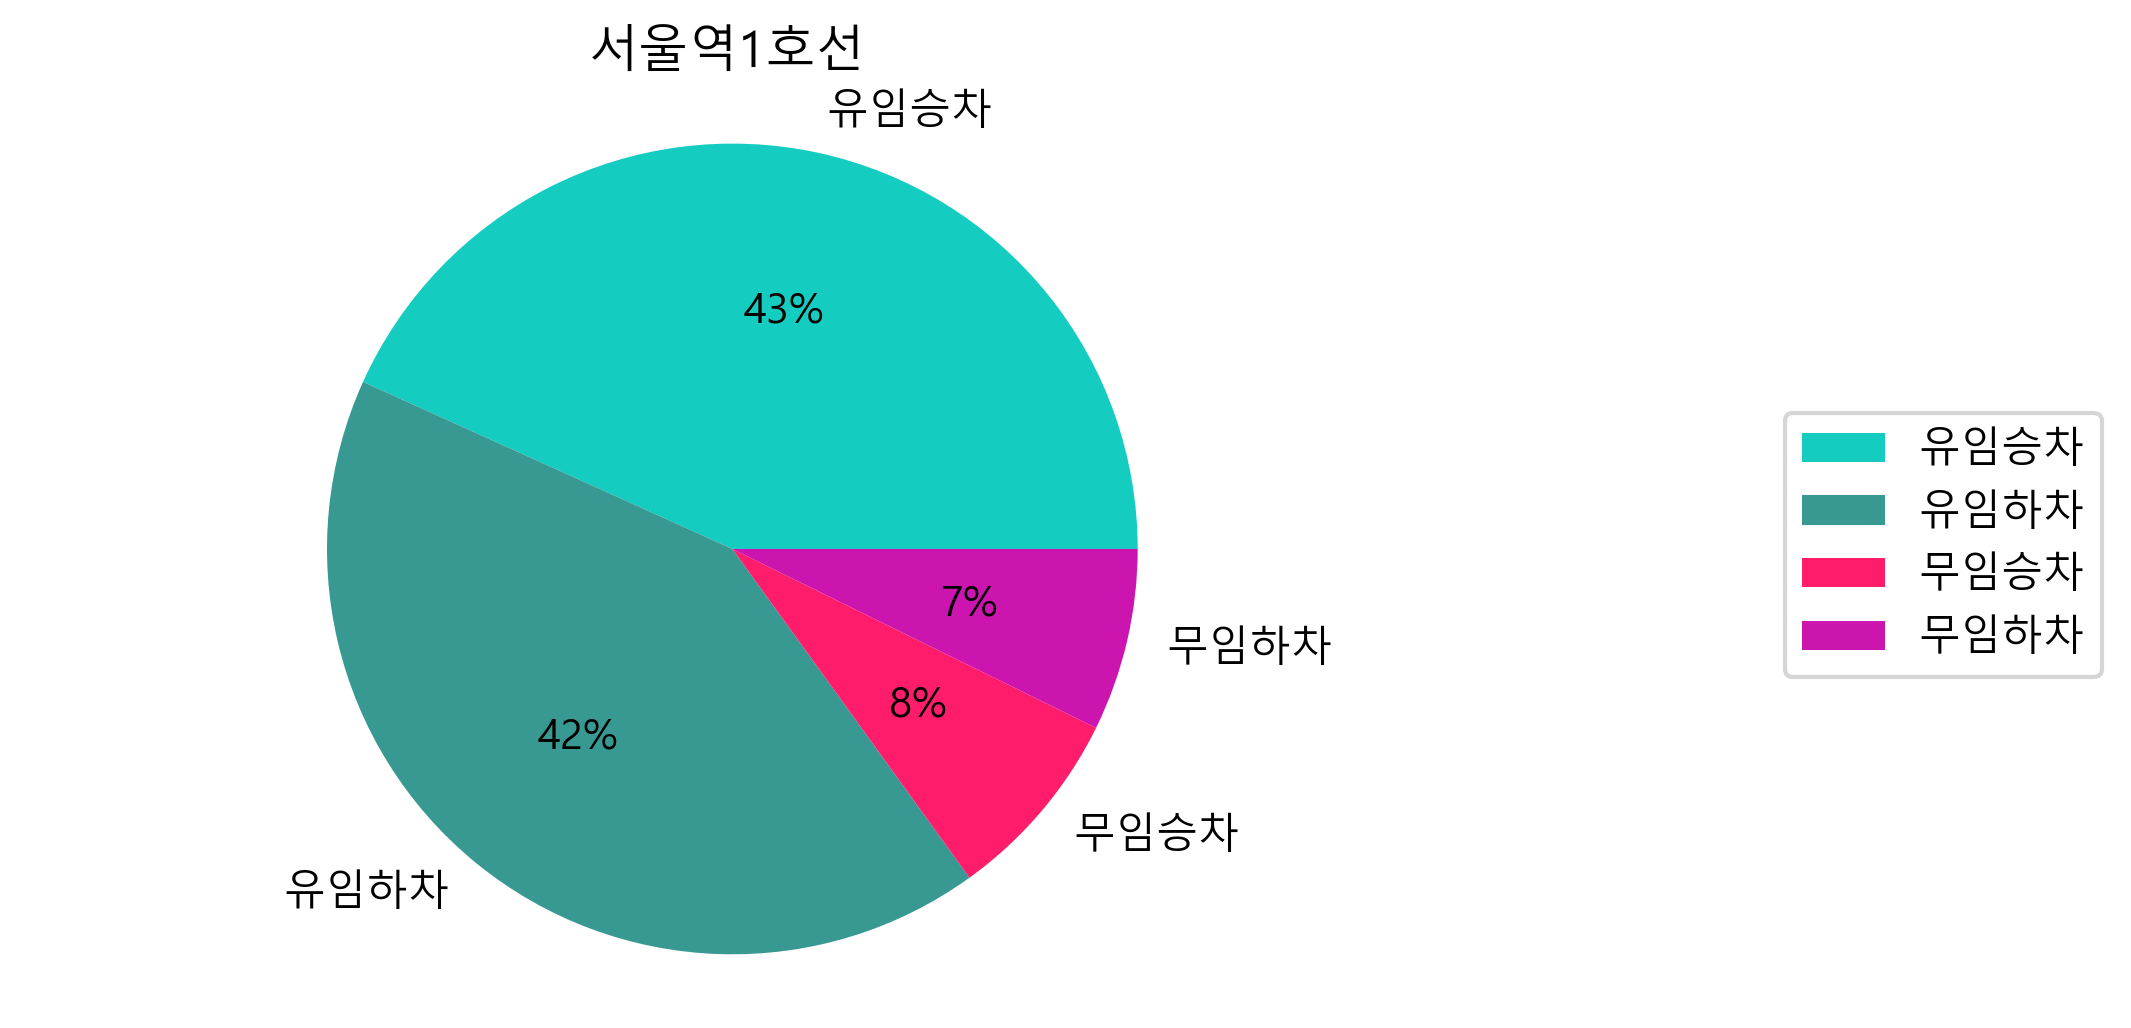

In [8]:
# 차트를 이미지로 저장하기
# 파일명 : 역이름+노선이름+확장자(row[3] + '' + row[1] + '.png')
# 유무임 승하차 비율 파이차트로 표현하기
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
color = ['#14ccc0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family = 'Malgun Gothic')

for row in data:
    for i in range(4, 8) :
        row[i] = int(row[i])
    plt.figure(dpi = 300)
    plt.title(row[3] + '' + row[1])
    
    plt.pie(row[4:8], labels = label, colors = color, autopct = '%1.f%%')
    plt.legend(loc = 'center right', bbox_to_anchor=(1, 0, 0.5, 1))
    plt.axis('equal')
    plt.savefig('./images/' + row[3] + ' ' + row[1] + '.png', bbox_inches='tight') # legend를 포함해서 이미지로 저장하려고 할 때 bbox_inches
    plt.show() # 파일로만 저장하려면 주석처리 해도됨
    break # 잘 저장되는지 테스트